In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [6]:
import os
import sys

# Appends the entire brainstation_capstone project folder to the path.
# This allows us to make a relative import of our scripts in brainstation_capstone/scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts import utils

In [7]:
DATA_PATH = utils.get_datapath()

# **Transforming Lyrics** 

In [8]:
df = pd.read_csv(DATA_PATH / 'clean_lyrics.csv')

In [10]:
display(df.head())
df.shape

,Unnamed: 0,song,lyrics,views,cleaned_lyrics
0,0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...,5589280.0,pour up drank head shot drank sit down drank ...
1,1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...,4592003.0,uh me and my niggas tryna get it ya bish ya b...
2,2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b...",4651514.0,america god bless you if its good to you amer...
3,3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock...",7378309.0,i love bad bitches thats my fuckin problem an...
4,4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo...",5113687.0,i got i got i got i got loyalty got royalty i...


(37905, 5)

# Bag of Words Using CountVectorizer

We will first eliminate the words that make up the top 10% of counts in all the lyrics and also the bottom 2.5% words. This vector also disregards common stop words in english.

In [41]:
X = df['cleaned_lyrics']
bag_of_words = CountVectorizer(max_df=0.90, min_df=0.025, stop_words='english')
bag_of_words.fit(X)

X_transformed = bag_of_words.transform(X)

In [42]:
X_transformed.shape

(37905, 933)

This provides us with a final sparse matrix with a shape of 37905 songs and a 933 vector representing the lyrics.

We also assign the `views` for each song to `y`.

In [43]:
y = df['views']
y.shape

(37905,)

The following shows the distribution for the top 20 words. 

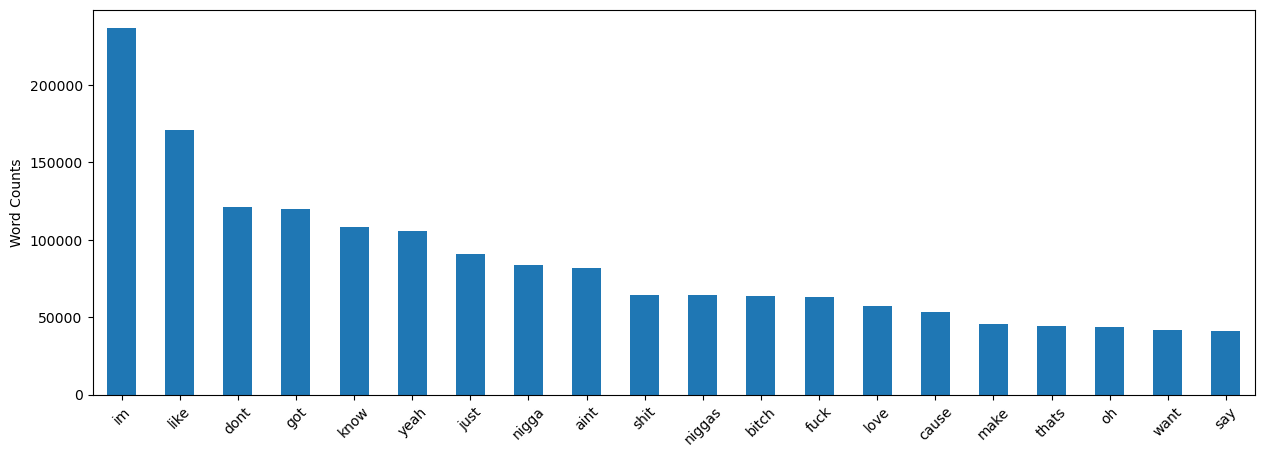

In [45]:
counts = np.array(X_transformed.sum(axis = 0))
words = bag_of_words.get_feature_names_out()
word_count_df = pd.DataFrame(
    {
        'counts': counts[0],
    },
    index=words
).sort_values('counts', ascending=False)
word_count_df.head(20).plot(kind='bar', figsize=(15,5), legend=False)
plt.ylabel('Word Counts')
plt.xticks(rotation=45);

# Splitting the Data

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.30, random_state=123)


# Training a Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

In [57]:
print(linear_regression.score(X_test, y_test))

-0.029029578877608264


In [59]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

-0.029029915645528703